In [69]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

img = cv2.imread('mei.jpg')

In [70]:
rows, cols = img.shape[:2]
pt1 = np.array([[50,50],[300,100],[200,300]],dtype=np.float32)
pt2 = np.array([[90,70],[330,150],[400,300]],dtype=np.float32)

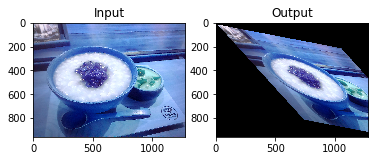

In [71]:
M_affine = cv2.getAffineTransform(pt1,pt2)
dst = cv2.warpAffine(img,M_affine,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()



In [72]:
while True:
    cv2.imshow('output',dst)
    k = cv2.waitKey(0)
    if k ==27:
        cv2.destroyAllWindows()
        break

In [73]:
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    cv2.putText(dst, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)


In [74]:
img_copy = img.copy()
for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    cv2.putText(dst, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)


In [76]:
img_affine = np.hstack((img_copy,dst))
img_try = cv2.resize(img_affine,None,fx=0.5,fy=0.5)
while True:
    cv2.imshow('affine', img_try)
    k = cv2.waitKey(0)
    if k  == 27:
        cv2.destroyAllWindows()
        break

#### 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [84]:

img = cv2.imread('mei.jpg')
rows, cols = img.shape[:2]

# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
M_rotate = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 0.2)

# 取得平移矩陣
M_translate = np.array([[1, 0, 100], [0, 1, -50]], dtype=np.float32)

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (cols, rows))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (cols, rows))

# 組合 + 顯示圖片

img_show_rotate_trans = np.hstack((img, img_rotate, img_rotate_trans))

while True:
    cv2.imshow('Rotate 45, scale 0.5, Translate x+100, y-50', img_show_rotate_trans)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break